------------------------------------------------------------------------------------------------------------
TEST V0
------------------------------------------------------------------------------------------------------------

Number of simulations:  500
Average RepSkew:  2.0119459080044133


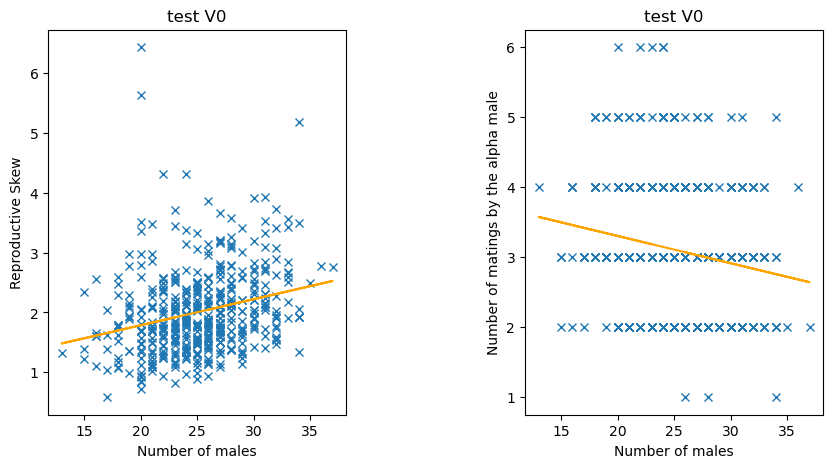

------------------------------------------------------------------------------------------------------------


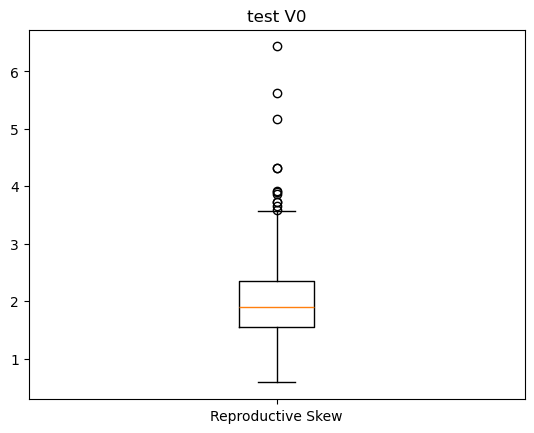

In [41]:
import matplotlib.pyplot as mp
import numpy as np
import os
from scipy.stats import multinomial

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    #print(sum(p))
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r_males,R,N):
    r_bar = R/N
    S = 0
    for i in range(N):
        S+= (r_males[i] - r_bar)**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------

print("------------------------------------------------------------------------------------------------------------")
print("TEST V0")
print("------------------------------------------------------------------------------------------------------------")
print()
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/RepSkew_test/"

RepSkew = []
Nmales = []
LMax = []
for NUM in range(1,501):
    File = FOLDER+"TestRepSkewV0:"+str(NUM)+".txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        r_males = []
        for val in Values:
            r_males.append(float(val))
        R = sum(r_males)
        if R > 0:
            N = len(r_males)
            Max = max(r_males)
            M_observed = M(r_males,R,N)
            M_multi = 0
            for j in range (100):
                r_males_multi = multinomial.rvs(R, [1/N for k in range(N)])
                M_multi = M(r_males_multi,R,N)
            RepSkew.append(M_observed - M_multi/100)   
            Nmales.append(N)
            LMax.append(Max)
            Text.close()

RepSkew_mean = np.mean(RepSkew)

print("Number of simulations: ",len(RepSkew))
print("Average RepSkew: ",RepSkew_mean)

    
Nmales= np.array(Nmales)

fig, ax = mp.subplots(1,2,figsize=(10, 5))  
fig.subplots_adjust(wspace=0.6)

a, b = np.polyfit(Nmales, RepSkew, 1)
Reg = a * Nmales + b
ax[0].plot(Nmales,RepSkew,marker="x",markersize=6,linestyle='None')
ax[0].plot(Nmales,Reg,color = "orange")
ax[0].set_xlabel("Number of males")
ax[0].set_ylabel("Reproductive Skew")
ax[0].set_title("test V0")

a, b = np.polyfit(Nmales, LMax, 1)
Reg = a * Nmales + b  
ax[1].plot(Nmales,LMax,marker="x",markersize=6,linestyle='None')
ax[1].plot(Nmales,Reg,color = "orange")
ax[1].set_xlabel("Number of males")
ax[1].set_ylabel("Number of matings by the alpha male")
ax[1].set_title("test V0")

mp.show()
print("------------------------------------------------------------------------------------------------------------")
fig, ax = mp.subplots()   
ax.boxplot([RepSkew],tick_labels=["Reproductive Skew"])
ax.set_title("test V0")
    
mp.show()

------------------------------------------------------------------------------------------------------------
TEST V1
------------------------------------------------------------------------------------------------------------

Beta coefficient  = 2
Number of simulations:  500
Average RepSkew:  2.5105434310796886


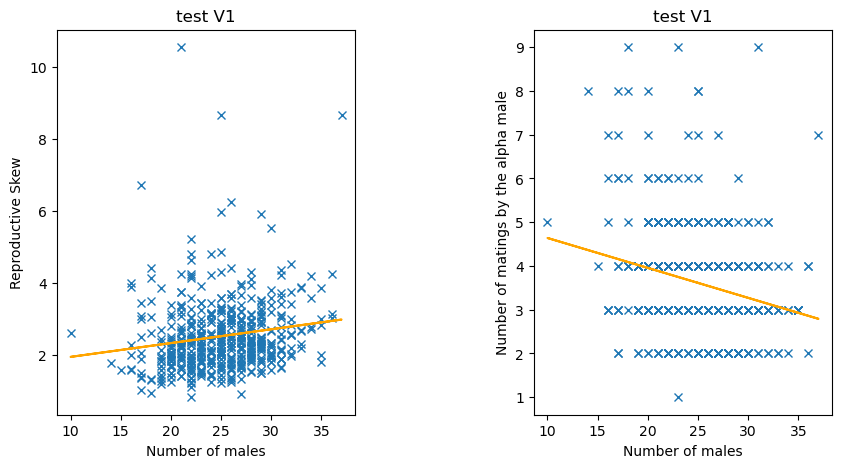

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 2.5
Number of simulations:  500
Average RepSkew:  2.854464220804


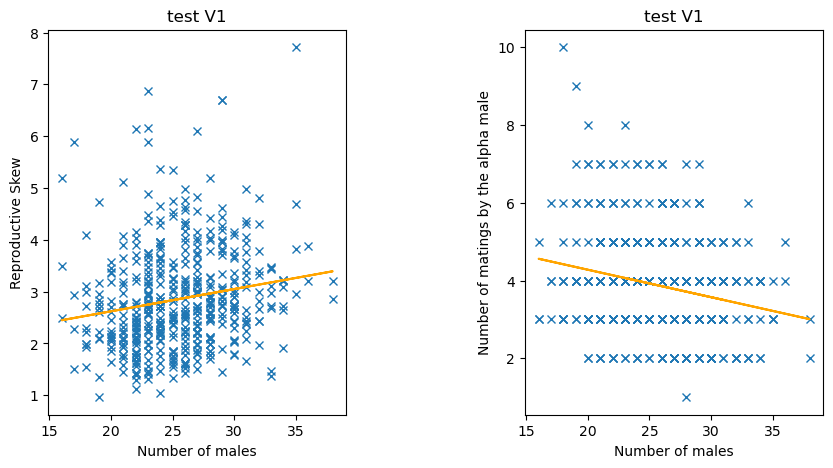

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 3
Number of simulations:  500
Average RepSkew:  3.1910849113188275


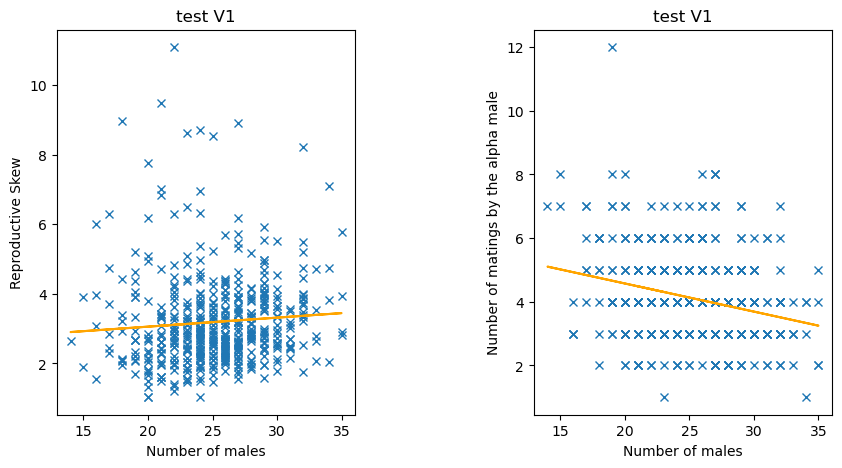

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 3.5
Number of simulations:  500
Average RepSkew:  3.5799460417855573


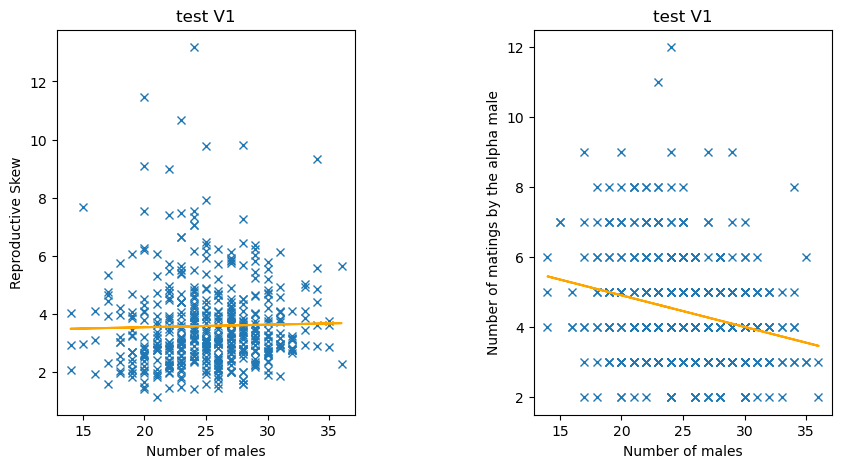

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 4
Number of simulations:  500
Average RepSkew:  3.9617517851046395


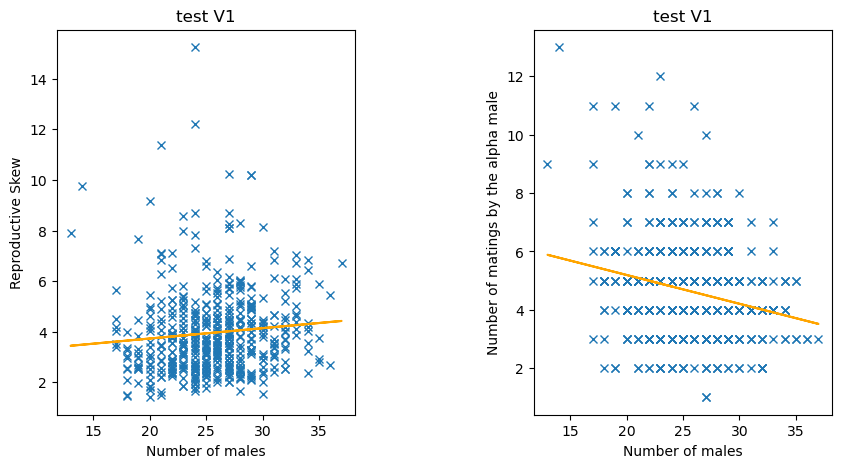

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 4.5
Number of simulations:  499
Average RepSkew:  4.4275795064285335


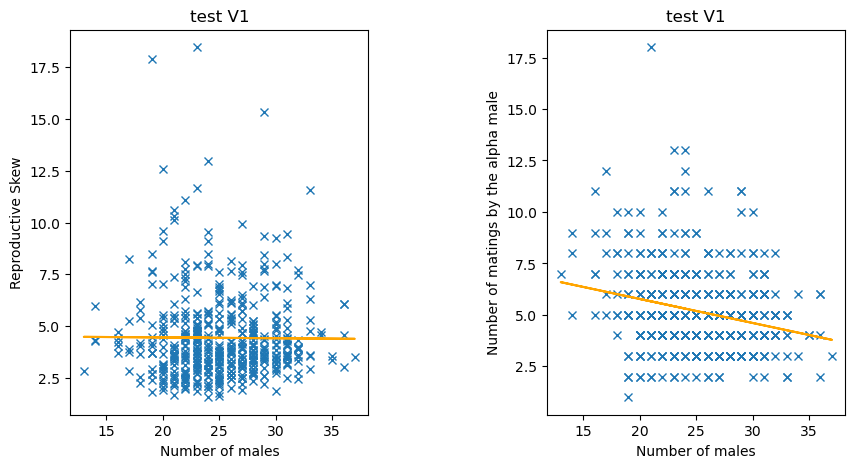

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 5
Number of simulations:  500
Average RepSkew:  4.732225249336885


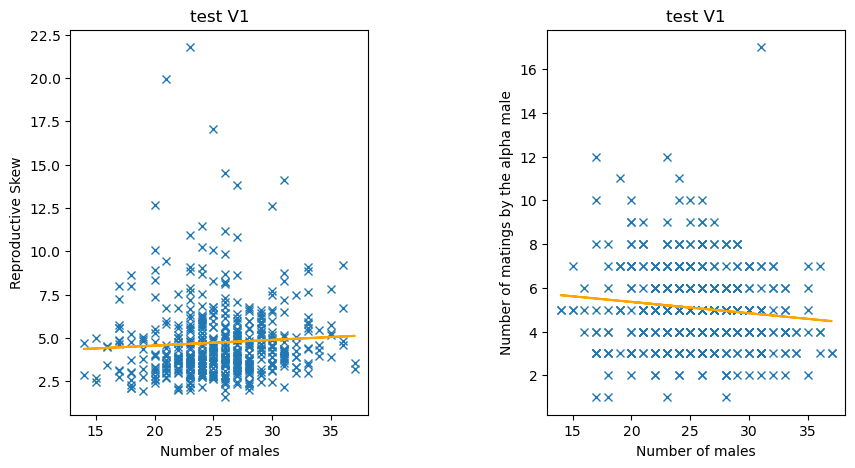

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 5.5
Number of simulations:  499
Average RepSkew:  5.011010540019338


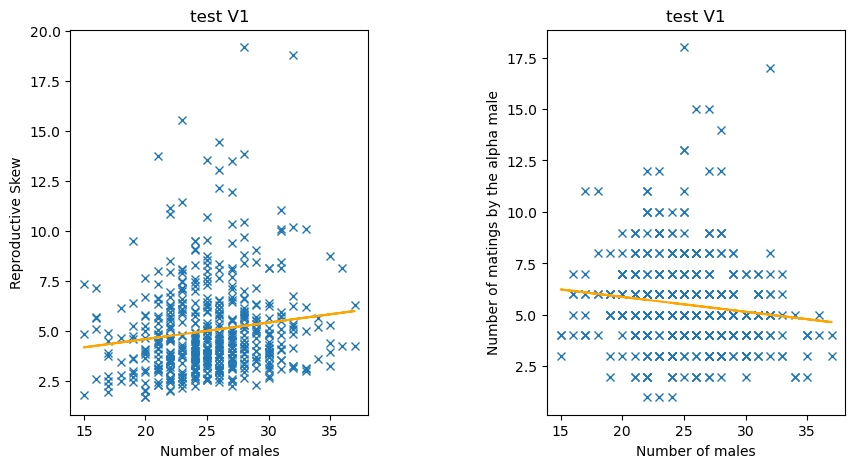

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 6
Number of simulations:  500
Average RepSkew:  5.286511998603708


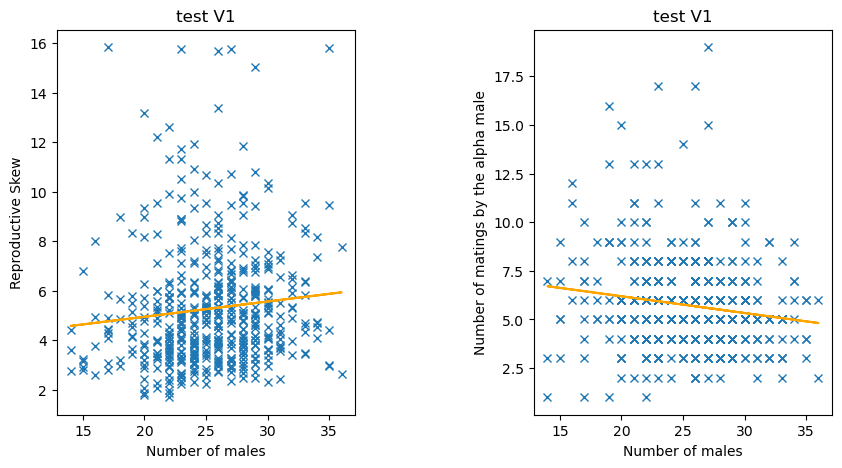

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 10
Number of simulations:  499
Average RepSkew:  8.086811604643149


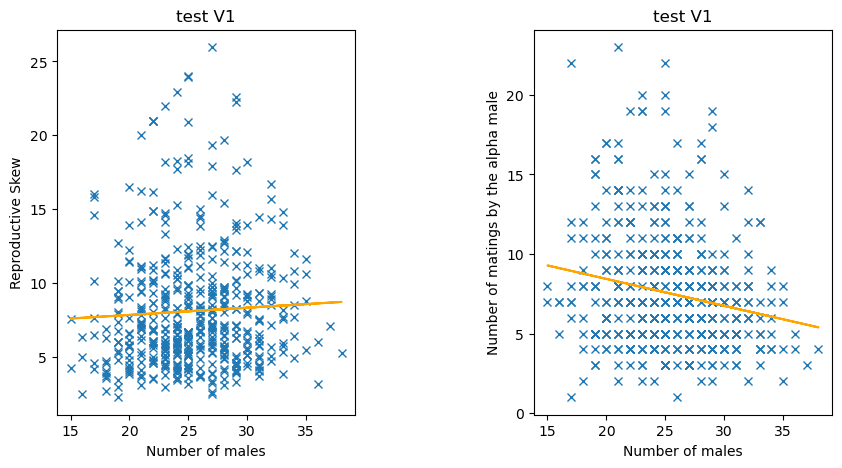

------------------------------------------------------------------------------------------------------------


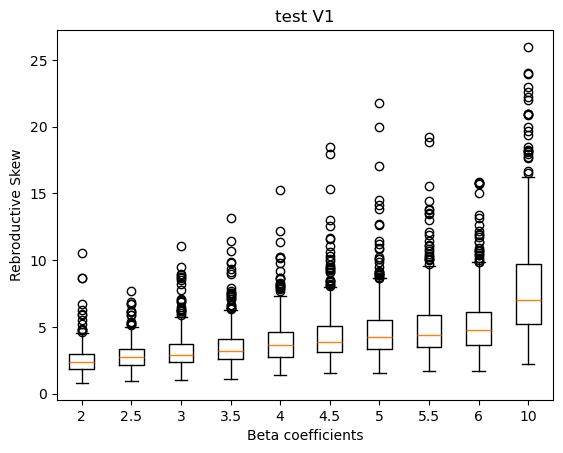

In [48]:
import matplotlib.pyplot as mp
import numpy as np
import os
from scipy.stats import multinomial

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    #print(sum(p))
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r_males,R,N):
    r_bar = R/N
    S = 0
    for i in range(N):
        S+= (r_males[i] - r_bar)**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------

print("------------------------------------------------------------------------------------------------------------")
print("TEST V1")
print("------------------------------------------------------------------------------------------------------------")
print()
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/RepSkew_test/"
Lbeta = [2,2.5,3,3.5,4,4.5,5,5.5,6,10]
LRS = [0 for i in range(len(Lbeta))]
compteur = 0
for beta in Lbeta:
    RepSkew = []
    Nmales = []
    LMax = []
    for NUM in range(1,501):
        File = FOLDER+"TestRepSkewV1:"+str(beta)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            r_males = []
            for val in Values:
                r_males.append(float(val))
            R = sum(r_males)
            if R > 0:
                N = len(r_males)
                Max = max(r_males)
                M_observed = M(r_males,R,N)
                M_multi = 0
                for j in range (100):
                    r_males_multi = multinomial.rvs(R, [1/N for k in range(N)])
                    M_multi = M(r_males_multi,R,N)
                RepSkew.append(M_observed - M_multi/100)   
                Nmales.append(N)
                LMax.append(Max)
                Text.close()
    LRS[compteur] = RepSkew
    RepSkew_mean = np.mean(RepSkew)

    print("Beta coefficient  = "+str(beta))
    print("Number of simulations: ",len(RepSkew))
    print("Average RepSkew: ",RepSkew_mean)
    
    Nmales= np.array(Nmales)
    fig, ax = mp.subplots(1,2,figsize=(10, 5))  
    fig.subplots_adjust(wspace=0.6)

    a, b = np.polyfit(Nmales, RepSkew, 1)
    Reg = a * Nmales + b
    ax[0].plot(Nmales,RepSkew,marker="x",markersize=6,linestyle='None')
    ax[0].plot(Nmales,Reg,color = "orange")
    ax[0].set_xlabel("Number of males")
    ax[0].set_ylabel("Reproductive Skew")
    ax[0].set_title("test V1")
    
    a, b = np.polyfit(Nmales, LMax, 1)
    Reg = a * Nmales + b  
    ax[1].plot(Nmales,LMax,marker="x",markersize=6,linestyle='None')
    ax[1].plot(Nmales,Reg,color = "orange")
    ax[1].set_xlabel("Number of males")
    ax[1].set_ylabel("Number of matings by the alpha male")
    ax[1].set_title("test V1")
    compteur += 1
    mp.show()
    print("------------------------------------------------------------------------------------------------------------")

fig, ax = mp.subplots()   
ax.boxplot(LRS,tick_labels=Lbeta)
ax.set_xlabel("Beta coefficients")
ax.set_ylabel("Rebroductive Skew")
ax.set_title("test V1")
    
mp.show()

------------------------------------------------------------------------------------------------------------
TEST V2
------------------------------------------------------------------------------------------------------------

Beta coefficient  = 2
Number of simulations:  500
Average RepSkew:  2.493553176899296


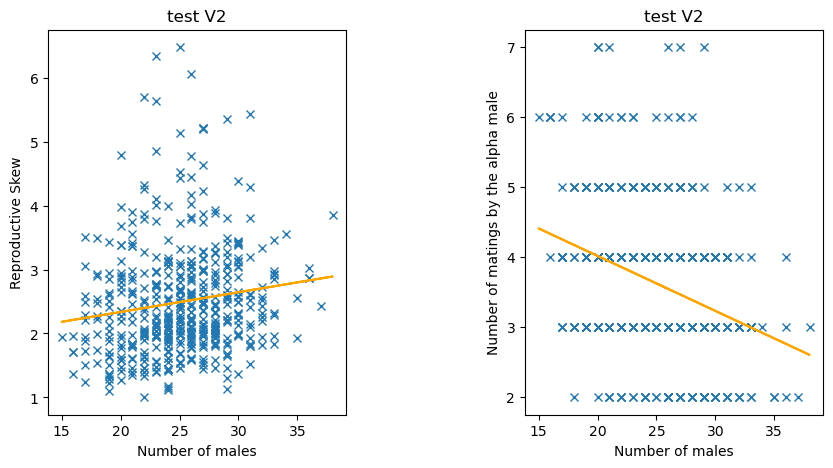

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 2.5
Number of simulations:  500
Average RepSkew:  2.8861924685348352


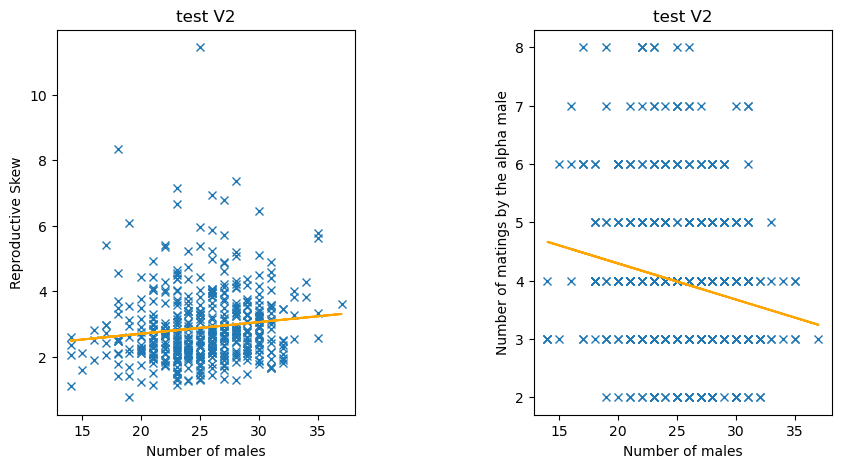

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 3
Number of simulations:  500
Average RepSkew:  3.191950436159034


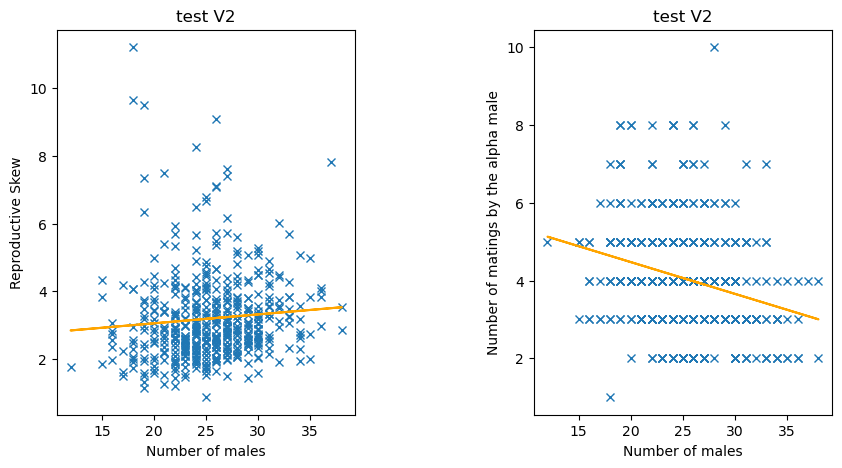

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 3.5
Number of simulations:  500
Average RepSkew:  3.581621741938352


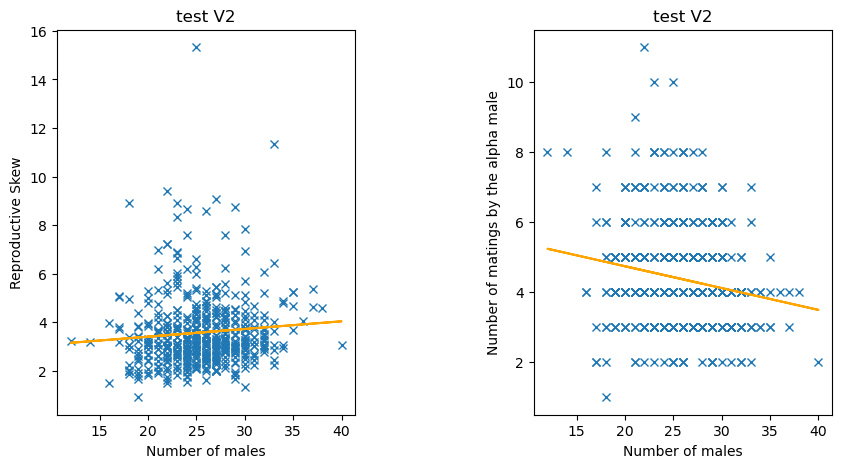

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 4
Number of simulations:  500
Average RepSkew:  3.7896899447806502


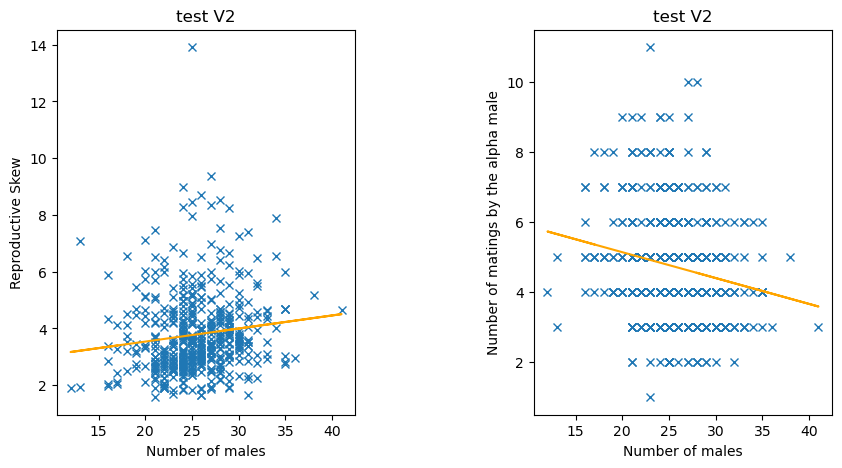

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 4.5
Number of simulations:  500
Average RepSkew:  4.08732395158282


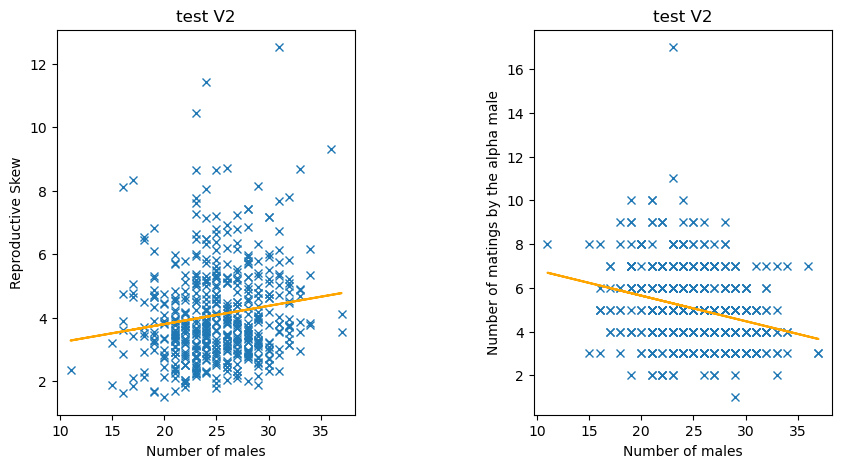

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 5
Number of simulations:  500
Average RepSkew:  4.49744663994107


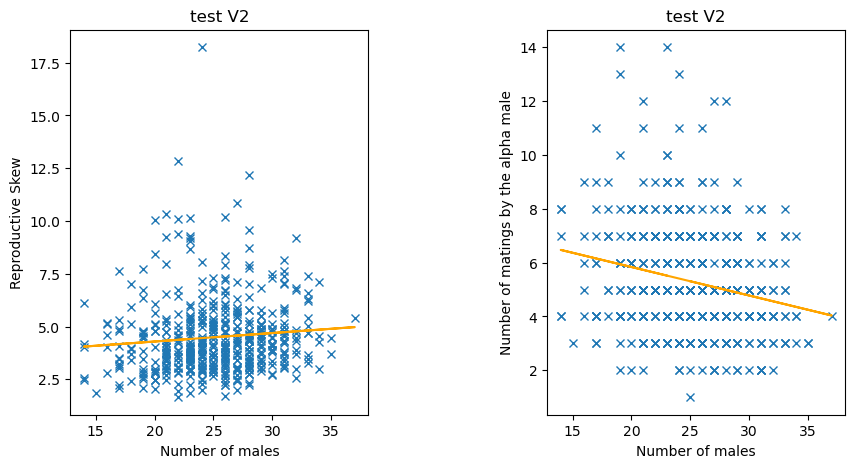

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 5.5
Number of simulations:  499
Average RepSkew:  4.988559131513827


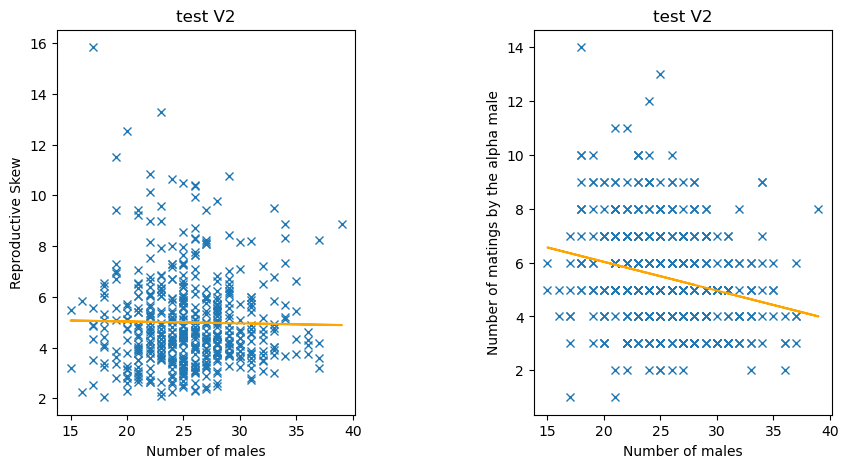

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 6
Number of simulations:  500
Average RepSkew:  5.247706808470404


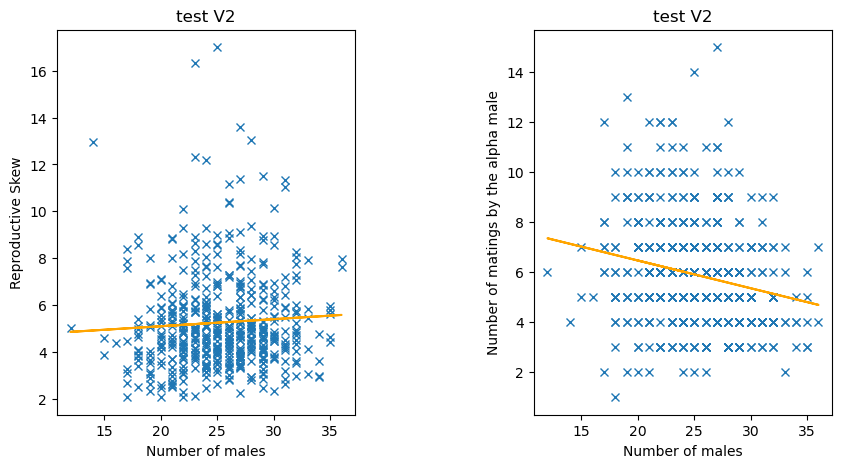

------------------------------------------------------------------------------------------------------------
Beta coefficient  = 10
Number of simulations:  500
Average RepSkew:  7.925631367617991


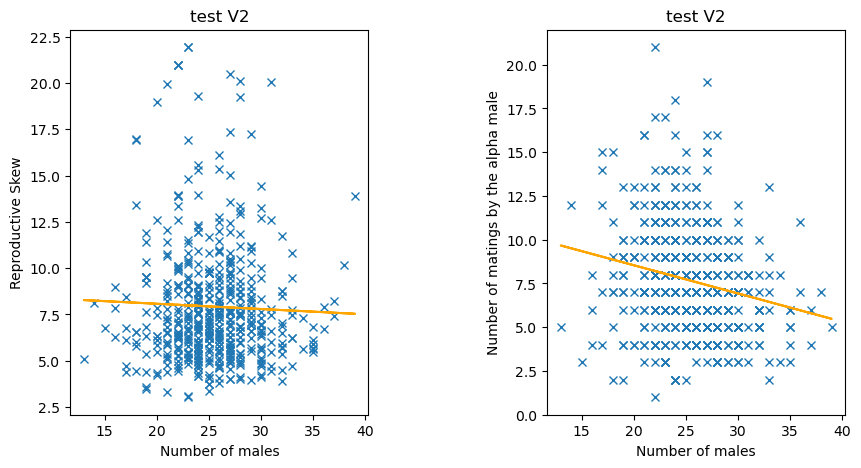

------------------------------------------------------------------------------------------------------------


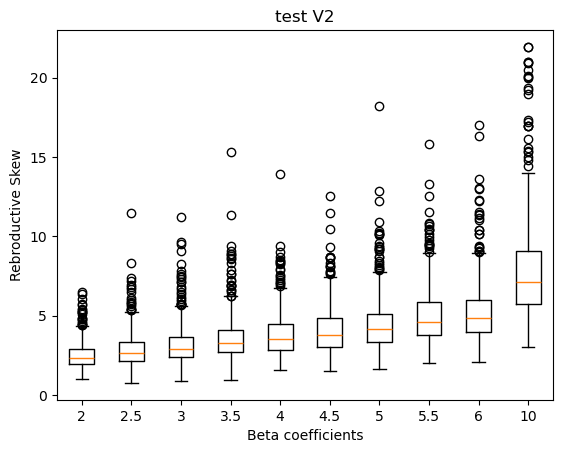

In [45]:
import matplotlib.pyplot as mp
import numpy as np
import os
from scipy.stats import multinomial

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    #print(sum(p))
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r_males,R,N):
    r_bar = R/N
    S = 0
    for i in range(N):
        S+= (r_males[i] - r_bar)**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------

print("------------------------------------------------------------------------------------------------------------")
print("TEST V2")
print("------------------------------------------------------------------------------------------------------------")
print()
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/RepSkew_test/"
Lbeta = [2,2.5,3,3.5,4,4.5,5,5.5,6,10]
LRS = [0 for i in range(len(Lbeta))]
compteur = 0
for beta in Lbeta:
    RepSkew = []
    Nmales = []
    LMax = []
    for NUM in range(1,501):
        File = FOLDER+"TestRepSkewV2:"+str(beta)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            r_males = []
            for val in Values:
                r_males.append(float(val))
            R = sum(r_males)
            if R > 0:
                Max = max(r_males)
                N = len(r_males)
                M_observed = M(r_males,R,N)
                M_multi = 0
                for j in range (100):
                    r_males_multi = multinomial.rvs(R, [1/N for k in range(N)])
                    M_multi = M(r_males_multi,R,N)
                RepSkew.append(M_observed - M_multi/100)   
                Nmales.append(N)
                LMax.append(Max)
                Text.close()
    LRS[compteur] = RepSkew
    RepSkew_mean = np.mean(RepSkew)

    print("Beta coefficient  = "+str(beta))
    print("Number of simulations: ",len(RepSkew))
    print("Average RepSkew: ",RepSkew_mean)
   
    Nmales= np.array(Nmales)
    fig, ax = mp.subplots(1,2,figsize=(10, 5))  
    fig.subplots_adjust(wspace=0.6)

    a, b = np.polyfit(Nmales, RepSkew, 1)
    Reg = a * Nmales + b
    ax[0].plot(Nmales,RepSkew,marker="x",markersize=6,linestyle='None')
    ax[0].plot(Nmales,Reg,color = "orange")
    ax[0].set_xlabel("Number of males")
    ax[0].set_ylabel("Reproductive Skew")
    ax[0].set_title("test V2")
    
    a, b = np.polyfit(Nmales, LMax, 1)
    Reg = a * Nmales + b  
    ax[1].plot(Nmales,LMax,marker="x",markersize=6,linestyle='None')
    ax[1].plot(Nmales,Reg,color = "orange")
    ax[1].set_xlabel("Number of males")
    ax[1].set_ylabel("Number of matings by the alpha male")
    ax[1].set_title("test V2")
    compteur += 1
    mp.show()
    print("------------------------------------------------------------------------------------------------------------")

fig, ax = mp.subplots()   
ax.boxplot(LRS,tick_labels=Lbeta)
ax.set_xlabel("Beta coefficients")
ax.set_ylabel("Rebroductive Skew")
ax.set_title("test V2")
    

mp.show()

------------------------------------------------------------------------------------------------------------
TEST V3
------------------------------------------------------------------------------------------------------------

Females per rank  = 1
Number of simulations:  500
Average RepSkew:  3.5395158275359004


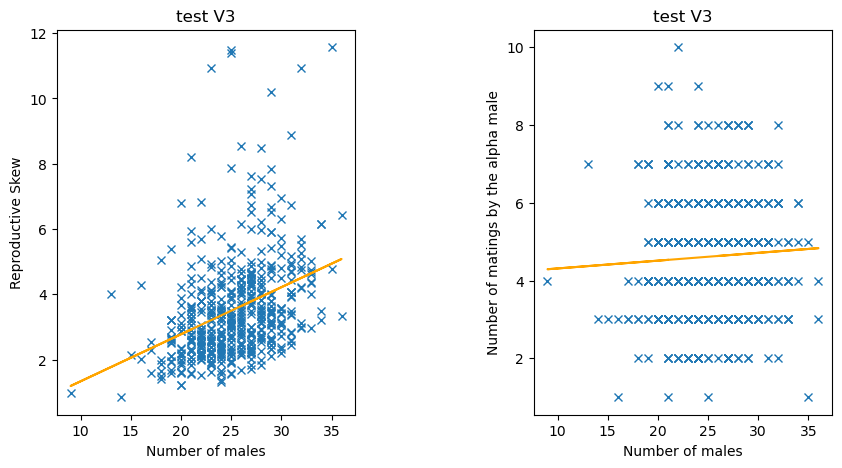

------------------------------------------------------------------------------------------------------------
Females per rank  = 2
Number of simulations:  500
Average RepSkew:  4.086246634897922


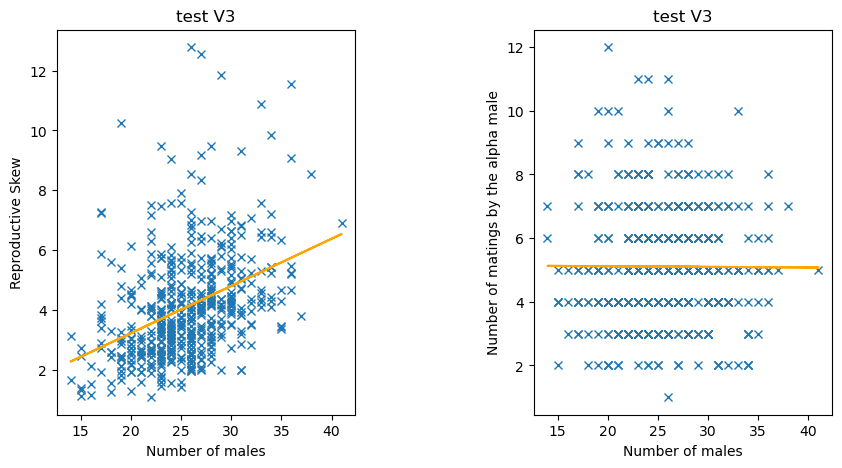

------------------------------------------------------------------------------------------------------------
Females per rank  = 5
Number of simulations:  500
Average RepSkew:  5.957442285266253


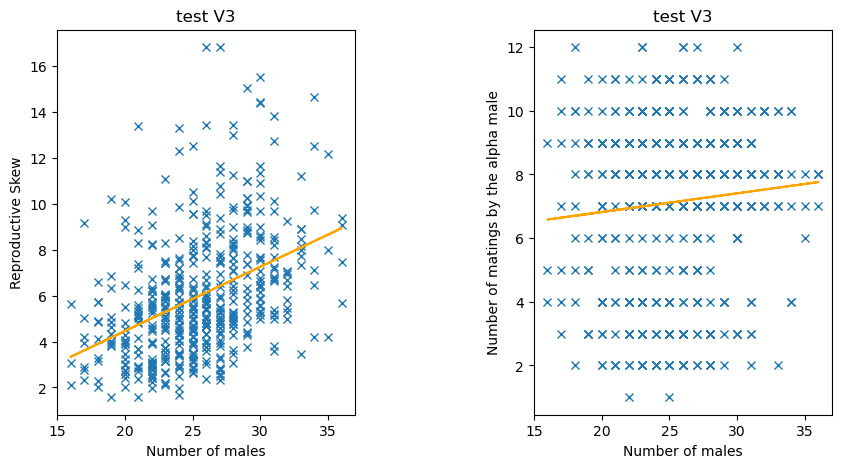

------------------------------------------------------------------------------------------------------------
Females per rank  = 7
Number of simulations:  500
Average RepSkew:  7.270339767507641


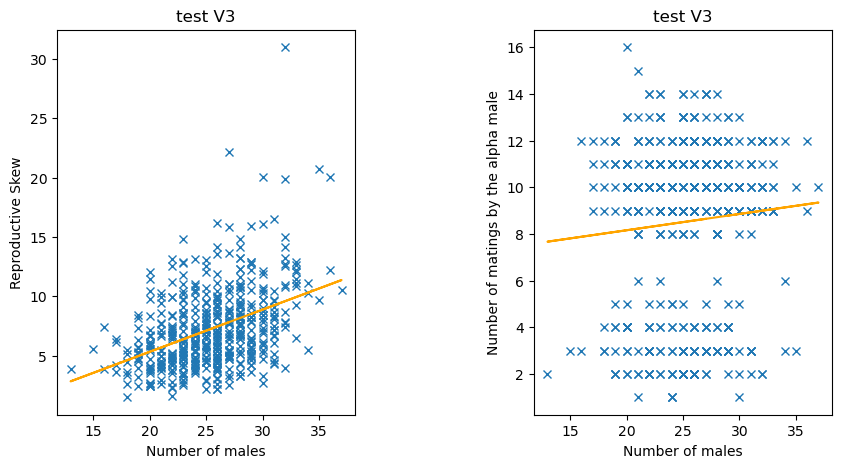

------------------------------------------------------------------------------------------------------------
Females per rank  = 10
Number of simulations:  499
Average RepSkew:  9.827598056807616


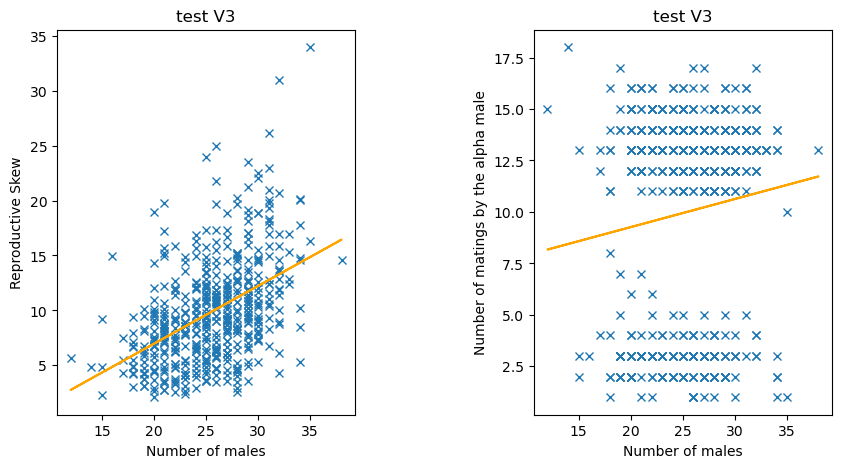

------------------------------------------------------------------------------------------------------------


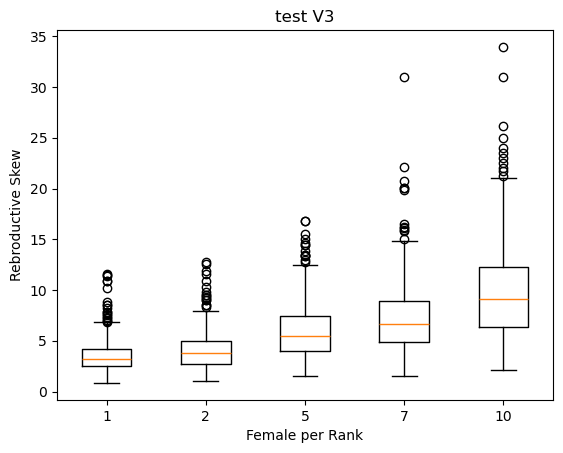

In [46]:
import matplotlib.pyplot as mp
import numpy as np
import os
from scipy.stats import multinomial

#------------------------------------------------------------------------------------------------------------------
## Fonctions
#------------------------------------------------------------------------------------------------------------------

def Multinomial (n,p):
    """
    Fonction qui simule la realisation d'une d'une loi multinomial de parametres n et p 
    """
    #print(sum(p))
    Sortie = [0 for j in range (len(p))]
    for k in range(n):
        u = random.random()
        i = 0
        sp = p[i]
        while u >= sp:
            i += 1
            sp += p[i]
        Sortie [i] += 1
    return Sortie     

def M(r_males,R,N):
    r_bar = R/N
    S = 0
    for i in range(N):
        S+= (r_males[i] - r_bar)**2
    return (N/R**2)*S

#------------------------------------------------------------------------------------------------------------------
## Main Program
#------------------------------------------------------------------------------------------------------------------

print("------------------------------------------------------------------------------------------------------------")
print("TEST V3")
print("------------------------------------------------------------------------------------------------------------")
print()
FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/RepSkew_test/"
LFPM = [1,2,5,7,10]
LRS = [0 for i in range(len(LFPM))]
compteur = 0
for F_P_M in LFPM:
    RepSkew = []
    Nmales = []
    LMax = []
    for NUM in range(1,501):
        File = FOLDER+"TestRepSkewV3:"+str(F_P_M)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            r_males = []
            for val in Values:
                r_males.append(float(val))
            R = sum(r_males)
            if R > 0:
                N = len(r_males)
                Max = max(r_males)
                M_observed = M(r_males,R,N)
                M_multi = 0
                for j in range (100):
                    r_males_multi = multinomial.rvs(R, [1/N for k in range(N)])
                    M_multi = M(r_males_multi,R,N)
                RepSkew.append(M_observed - M_multi/100)   
                Nmales.append(N)
                LMax.append(Max)
                Text.close()
    LRS[compteur] = RepSkew
    RepSkew_mean = np.mean(RepSkew)

    print("Females per rank  = "+str(F_P_M))
    print("Number of simulations: ",len(RepSkew))
    print("Average RepSkew: ",RepSkew_mean)
    
    Nmales= np.array(Nmales)
    fig, ax = mp.subplots(1,2,figsize=(10, 5))  
    fig.subplots_adjust(wspace=0.6)

    a, b = np.polyfit(Nmales, RepSkew, 1)
    Reg = a * Nmales + b
    ax[0].plot(Nmales,RepSkew,marker="x",markersize=6,linestyle='None')
    ax[0].plot(Nmales,Reg,color = "orange")
    ax[0].set_xlabel("Number of males")
    ax[0].set_ylabel("Reproductive Skew")
    ax[0].set_title("test V3")
    
    a, b = np.polyfit(Nmales, LMax, 1)
    Reg = a * Nmales + b  
    ax[1].plot(Nmales,LMax,marker="x",markersize=6,linestyle='None')
    ax[1].plot(Nmales,Reg,color = "orange")
    ax[1].set_xlabel("Number of males")
    ax[1].set_ylabel("Number of matings by the alpha male")
    ax[1].set_title("test V3")
    compteur += 1
    mp.show()
    print("------------------------------------------------------------------------------------------------------------")

fig, ax = mp.subplots()   
ax.boxplot(LRS,tick_labels=LFPM)
ax.set_xlabel("Female per Rank")
ax.set_ylabel("Rebroductive Skew")
ax.set_title("test V3")

mp.show()